# __BANKRUPTCY PREVENTION__

## Binary Classification Task

# CONTENTS <a id="home"></a>
[1.Importing Libraries and Reading File](#1)<br>
[2.Checking for Missing values](#2)<br>
[3.Checking for Correlation](#3)<br>
[4.pandas.Crosstab](#6)<br>
[5.Distribution Plot](#4)<br>
[6.Violin and Strip Plot](#12)<br>
[7.Count Plot](#5)<br>
[8.Histogram plots](#7)<br>
[9.Density Estimate Plots](#8)<br>
[10.Grouped Bar Charts using sns.catplot](#9)<br>
[11.Stacked Bar Charts](#10)<br>
[12.Conclution](#11)


### Importing Libraries and Reading the file  <a id="1"></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy.stats import spearmanr,kendalltau
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [4]:
data=pd.read_csv("A:\\Data Science by Excelr\\PROJECT\\bankruptcy_prevention.csv",sep=";")

In [5]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [6]:
data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
5,1.0,1.0,0.0,0.5,0.0,0.5,bankruptcy
6,1.0,1.0,0.0,0.0,0.0,0.0,bankruptcy
7,1.0,1.0,0.0,0.0,0.0,0.5,bankruptcy
8,1.0,1.0,0.0,0.5,0.0,0.0,bankruptcy
9,1.0,1.0,0.0,0.5,0.0,1.0,bankruptcy


### Checking For Null Values:  <a id="2"></a>

In [7]:
data.isnull().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [9]:
data.shape

(250, 7)

In [10]:
data.describe(include="all")

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250
unique,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,non-bankruptcy
freq,NaN,NaN,NaN,NaN,NaN,NaN,143
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000,NaN
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,NaN
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,NaN


In [11]:
data.nunique()

industrial_risk           3
 management_risk          3
 financial_flexibility    3
 credibility              3
 competitiveness          3
 operating_risk           3
 class                    2
dtype: int64

In [12]:
data1=data

### Renaming column to avoid errors

In [13]:
data1=data1.rename(columns = {data.columns[6]: 'class_value'})
data1=data1.rename(columns = {data.columns[5]: 'operating_risk'})
data1=data1.rename(columns = {data.columns[4]: 'competitiveness'})
data1=data1.rename(columns = {data.columns[3]: 'credibility'})
data1=data1.rename(columns = {data.columns[2]: 'financial_flexibility'})
data1=data1.rename(columns = {data.columns[1]: 'management_risk'})

In [14]:
data1.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_value
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [15]:
label_encoder = preprocessing.LabelEncoder()
data1["class_value"] = label_encoder.fit_transform(data1["class_value"])

### Checking for Correlation: <a id="3"></a>

In [16]:
corr=data1.corr()
corr

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_value
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,-0.227823
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,-0.370838
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,0.751020
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,0.755909
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,0.899452
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,-0.279786
class_value,-0.227823,-0.370838,0.751020,0.755909,0.899452,-0.279786,1.000000


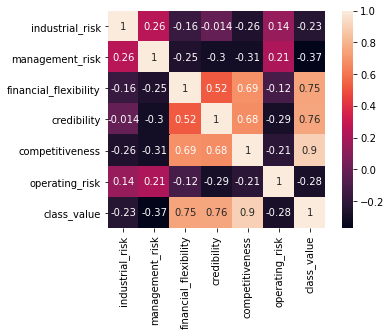

In [17]:
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=0)
plt.show()

### The Correlation values between most variables are not high and so its confusing to find the importance of variables in predicting classes.
***

In [18]:
features=data1.columns[0:6]
features

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk'],
      dtype='object')

## Calculating Non Parametric Rank Correlation to understand correlation b/w data on Discrete values of features.

## Spearmans Correlation

In [19]:
for feature in features:
    coef, p = spearmanr(data1[feature], data1.class_value)
    print("Correlation of %s"%feature, coef)

Correlation of industrial_risk -0.22947170756968077
Correlation of management_risk -0.37439127379904413
Correlation of financial_flexibility 0.7829528097863406
Correlation of credibility 0.7618550599211005
Correlation of competitiveness 0.9059986995626482
Correlation of operating_risk -0.278442572969297


## Kendall's Correlation

In [20]:
for feature in features:
    coef, p = kendalltau(data1[feature], data1.class_value)
    print("Correlation of %s"%feature, coef)

Correlation of industrial_risk -0.2163785912452097
Correlation of management_risk -0.35468549438782987
Correlation of financial_flexibility 0.7422101139825333
Correlation of credibility 0.7186345687862299
Correlation of competitiveness 0.8577141969809939
Correlation of operating_risk -0.2637672137089971


### Kendall’s Rank Correlation is highly precise for Discrete Data than Spearman's Correlation.(Rank Based- Low, Medium, High)[click for reference link](https://machinelearningmastery.com/how-to-calculate-nonparametric-rank-correlation-in-python/)
***

## Using Crosstab: <a id="6"></a>
### We now use Crosstab from pandas to understand each feature with respect to Bankruptcy.

In [21]:
data1.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class_value'],
      dtype='object')

In [22]:
pd.crosstab(data1.industrial_risk, data1.class_value)

class_value,0,1
industrial_risk,,
0.0,26,54
0.5,28,53
1.0,53,36


In [23]:
pd.crosstab(data1.industrial_risk, data1.class_value, normalize='index')

class_value,0,1
industrial_risk,,
0.0,0.325000,0.675000
0.5,0.345679,0.654321
1.0,0.595506,0.404494


In [24]:
pd.crosstab(data1.management_risk, data1.class_value, normalize='index')

class_value,0,1
management_risk,,
0.0,0.177419,0.822581
0.5,0.333333,0.666667
1.0,0.613445,0.386555


In [25]:
pd.crosstab(data1.financial_flexibility, data1.class_value)

class_value,0,1
financial_flexibility,,
0.0,102,17
0.5,4,70
1.0,1,56


In [26]:
pd.crosstab(data1.financial_flexibility, data1.class_value, normalize='index')

class_value,0,1
financial_flexibility,,
0.0,0.857143,0.142857
0.5,0.054054,0.945946
1.0,0.017544,0.982456


In [27]:
pd.crosstab(data1.credibility, data1.class_value, normalize='index')

class_value,0,1
credibility,,
0.0,0.925532,0.074468
0.5,0.220779,0.779221
1.0,0.037975,0.962025


In [28]:
pd.crosstab(data1.competitiveness, data1.class_value, normalize='index')

class_value,0,1
competitiveness,,
0.0,1.000000,0.000000
0.5,0.071429,0.928571
1.0,0.000000,1.000000


In [29]:
pd.crosstab(data1.operating_risk, data1.class_value, normalize='index')

class_value,0,1
operating_risk,,
0.0,0.240506,0.759494
0.5,0.421053,0.578947
1.0,0.561404,0.438596


In [30]:
pd.crosstab(data1.financial_flexibility, data1.competitiveness, normalize='index')

competitiveness,0.0,0.5,1.0
financial_flexibility,,,
0.0,0.823529,0.067227,0.109244
0.5,0.054054,0.432432,0.513514
1.0,0.017544,0.280702,0.701754


### From the pandas.crosstab, we can see the relation between each features with the classes. <br>And it is understood that all features contribute in determining the Bankruptcy. <br>Also we notice that Financial flexibility, Credibility and Competitiveness does the most contribution to the Bankruptcy.
***

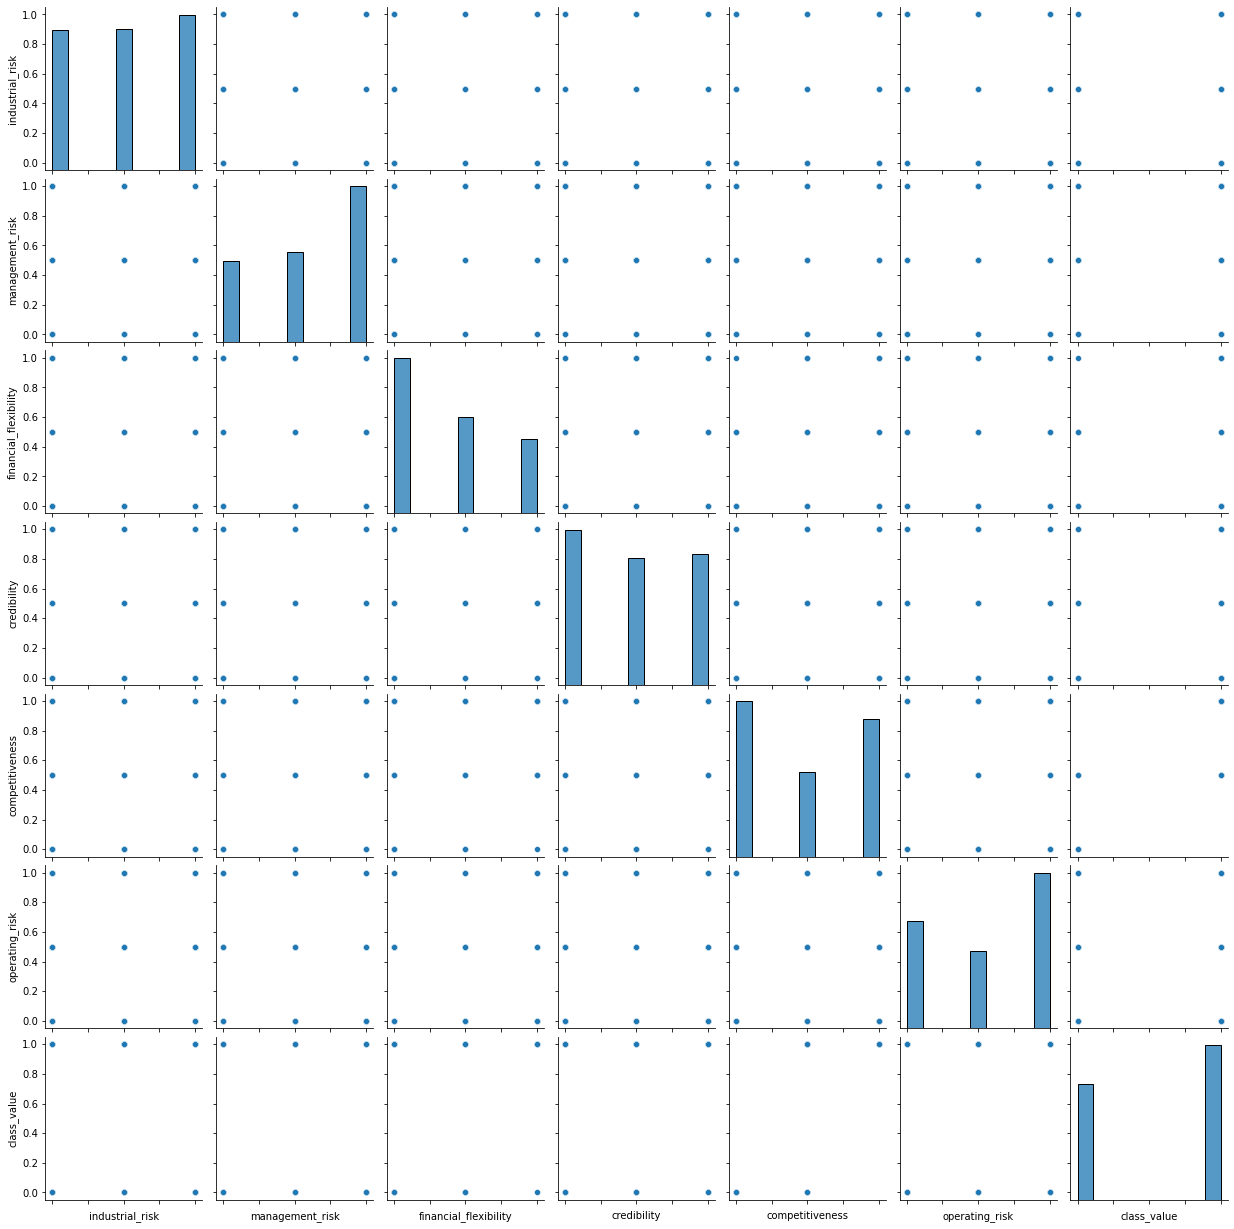

In [31]:
p=sns.pairplot(data1)
p.set(xticklabels=[])
plt.show()

### Pairplot for this data has proven to be not useful because the data is not continuous. Lets explore a bit more on sns.
***

## Distribution Plot <a id="4"></a>

C:\Users\new\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


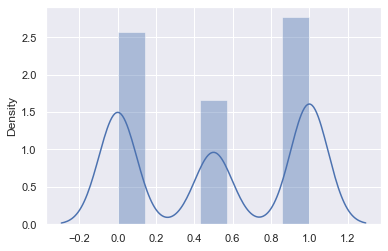

In [32]:
sns.set_theme();
ax = sns.distplot(data1)

### Distribution of the dataset is understood through this plot.
***

## Basic Understanding with Count Plot <a id="5"></a>

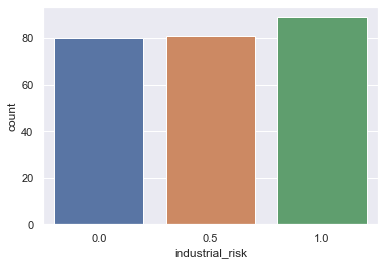

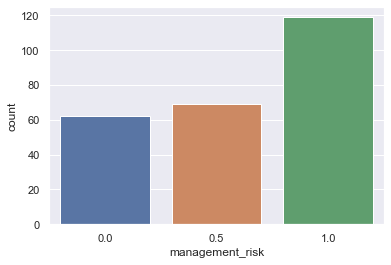

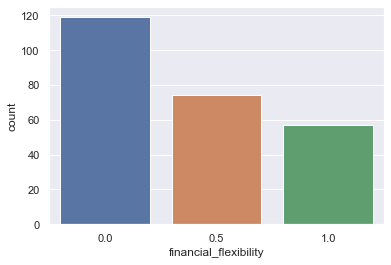

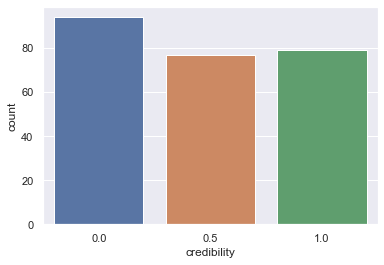

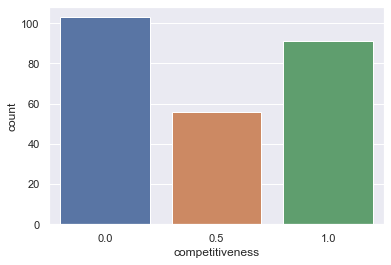

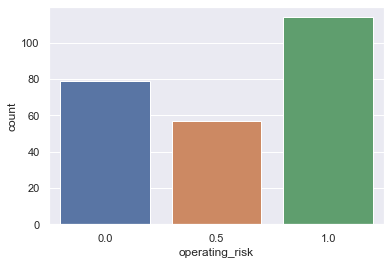

In [33]:
for feature in features:
    sns.countplot(x=feature,data=data1)
    plt.show()

### The above graph are plotted for the features against Bankruptcy which says the count of feature for all the 3 discrete values(i.e. 0,0.5 and 1).
***

## Violin and Strip Plot <a id="12"></a>

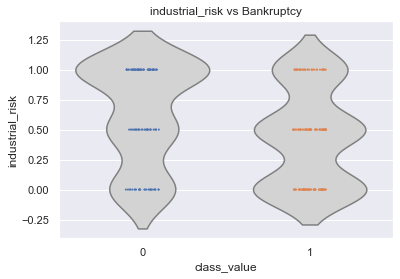

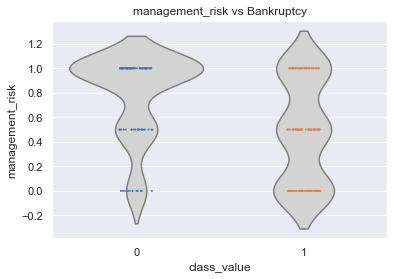

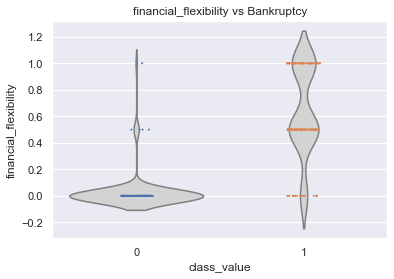

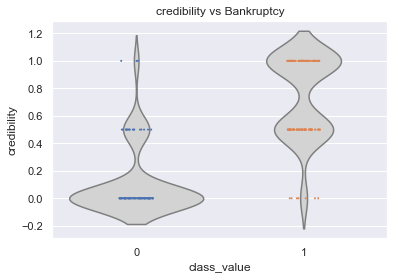

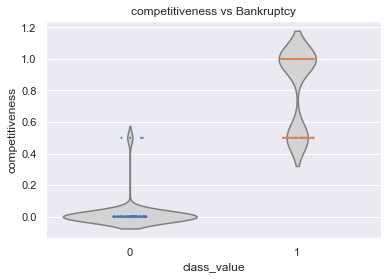

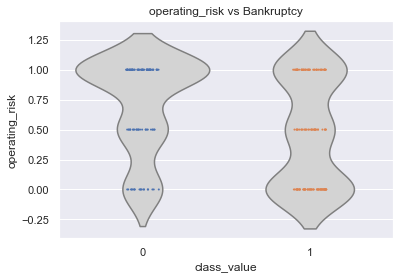

In [34]:
for feature in features:
    sns.violinplot(x='class_value', y=feature, data=data1, inner=None,color='lightgray')
    sns.stripplot(x='class_value', y=feature, data=data1, size=2,jitter=True)
    plt.ylabel(feature)
    plt.title("%s vs Bankruptcy"%feature)
    plt.show()

### From above all violineplot & stripplot we can understand three feature(Financial Flexibility , Credibility and Competitiveness) are highly correlated with dependent variable.
***

## Histogram plots <a id="7"></a>

In [35]:
data1.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_value
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


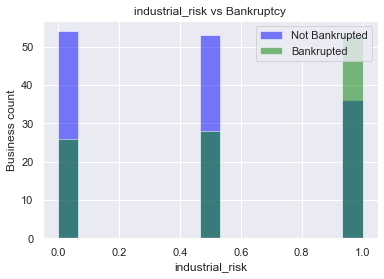

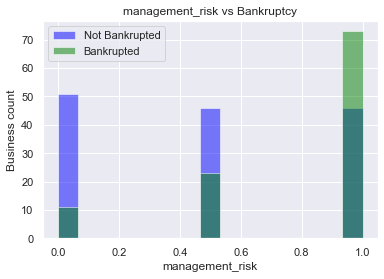

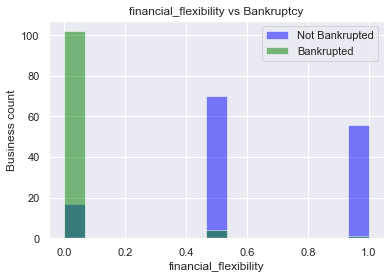

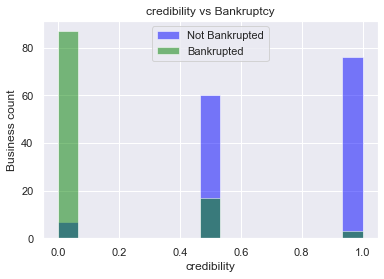

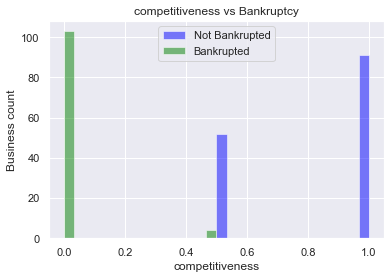

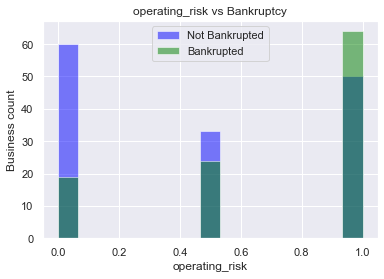

In [36]:
for feature in features:
    fig, ax = plt.subplots()

    ax.hist(data1[data1["class_value"]==1][feature], bins=15, alpha=0.5, color="blue", label="Not Bankrupted")
    ax.hist(data1[data1["class_value"]==0][feature], bins=15, alpha=0.5, color="green", label="Bankrupted")

    ax.set_xlabel(feature)
    ax.set_ylabel("Business count")
    ax.set_title("%s vs Bankruptcy"%feature)

    ax.legend();

### The above bar graphs tells us the relation between each feature and the count of business with bankruptcy
***

## Density Estimate Plots <a id="8"></a>

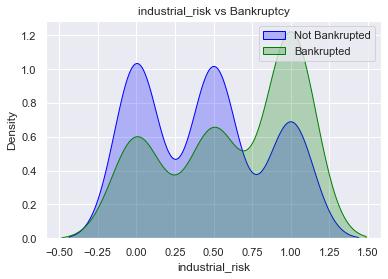

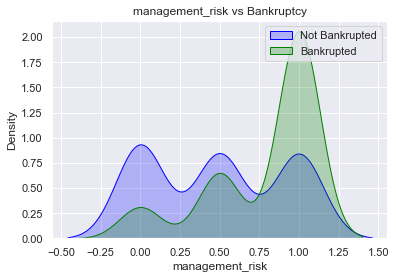

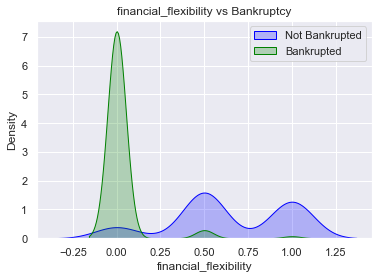

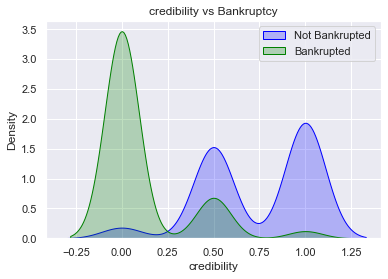

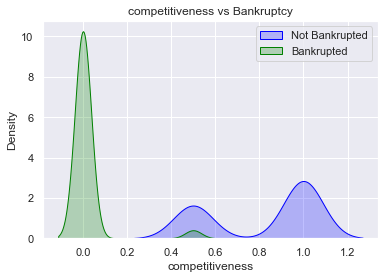

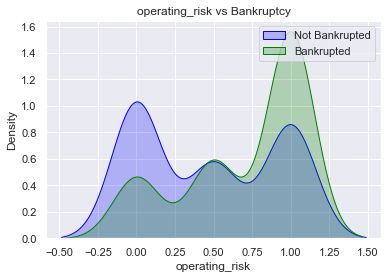

In [37]:
for feature in features:
    fig, ax = plt.subplots()

    sns.kdeplot(data1[data1["class_value"]==1][feature], shade=True, color="blue", label="Not Bankrupted", ax=ax)
    sns.kdeplot(data1[data1["class_value"]==0][feature], shade=True, color="green", label="Bankrupted", ax=ax)

    ax.set_xlabel(feature)
    ax.set_ylabel("Density")
    ax.set_title("%s vs Bankruptcy"%feature)
    #fig.suptitle("Financial Flexibility vs. Bankruptcy");
    ax.legend();

### The above graphs show the density of Bankruptcy happening w.r.t different features. We can understand the spread of data with this graph i.e. Normal distribution.<br>Also we can know from the peaks of a Density Plot where values are concentrated over the interval. <br>We can also understand the distribution shape from the above plots.
***

## Grouped Bar Charts using sns.catplot - Type 1 <a id="9"></a>

C:\Users\new\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\new\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\new\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\new\anaconda3\lib\site-packa

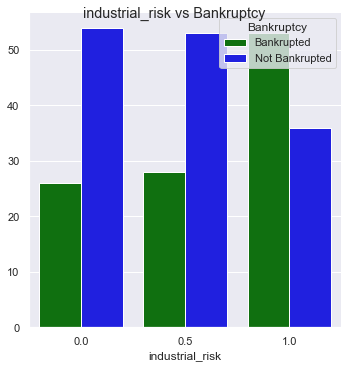

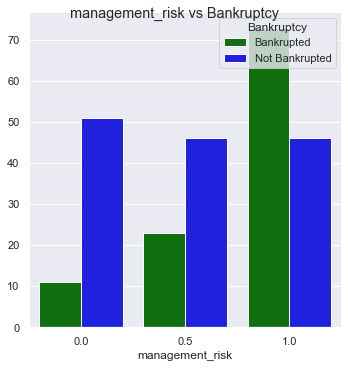

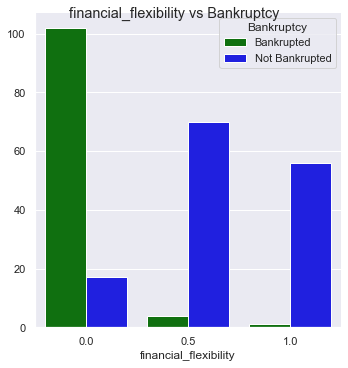

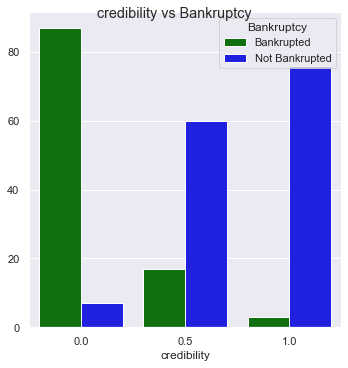

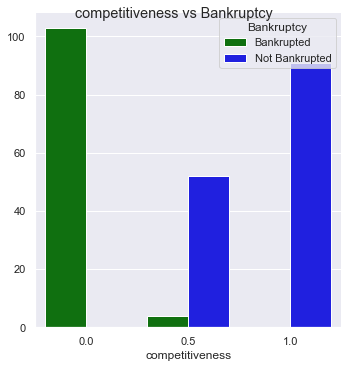

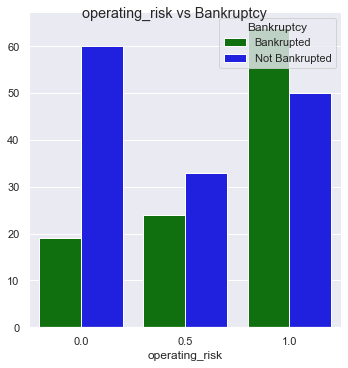

In [38]:
for feature in features:
    g=sns.catplot(feature, hue="class_value", data=data1, kind="count",legend = False,
            palette={1:"blue", 0:"green"})

    g.set_axis_labels(feature,"")
    plt.legend(title='Bankruptcy', loc='upper right', labels=['Bankrupted', 'Not Bankrupted'])
    #g.set_title("%s vs Bankruptcy"%feature)
    g.fig.suptitle("%s vs Bankruptcy"%feature);

### The above graph is grouped based on bankruptcy along the features. <br>Here we can look at both classes w.r.t features side by side and understand data better.
***

## Grouped Bar Charts using sns.catplot - Type 2

C:\Users\new\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\new\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\new\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\new\anaconda3\lib\site-packa

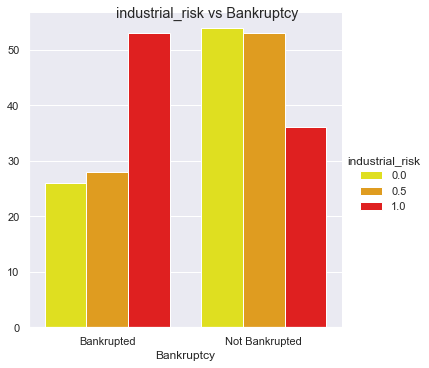

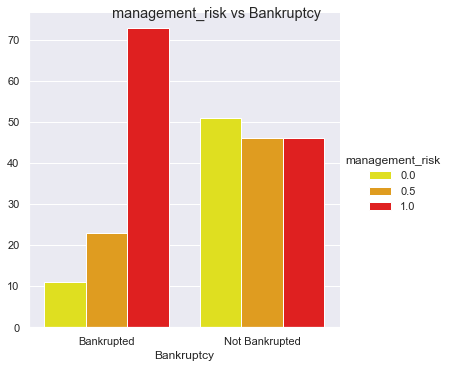

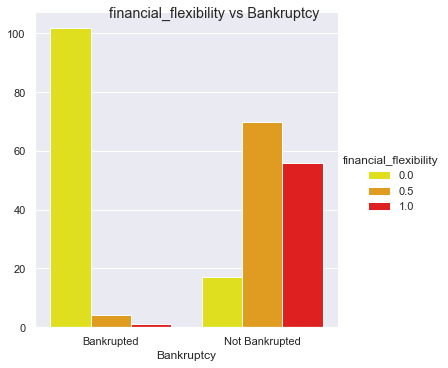

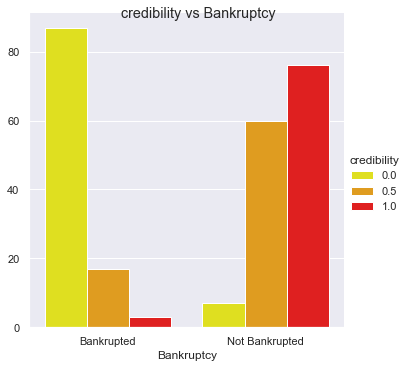

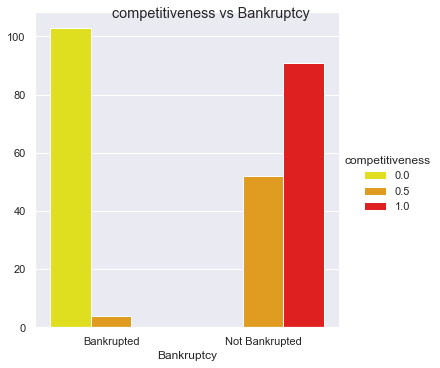

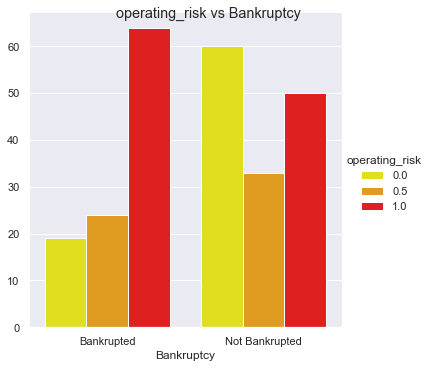

In [39]:
for feature in features:
    g=sns.catplot("class_value", hue=feature, data=data1, kind="count", 
            palette={0:"yellow", 0.5:"orange", 1:"red"})

    g.legend.set_title(feature)
    g.set_xticklabels(["Bankrupted", "Not Bankrupted"])
    g.set_axis_labels("Bankruptcy","")

    g.fig.suptitle("%s vs Bankruptcy"%feature);

### The above graph is grouped based on features along with Bankruptcy.<br>Here we can look at different feature values w.r.t Bankruptcy side by side and understand data better
***

## Stacked Bar Charts for checking proportion <a id="10"></a>

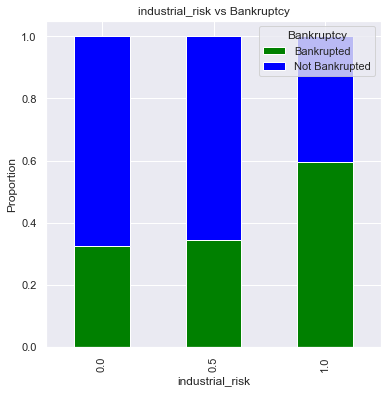

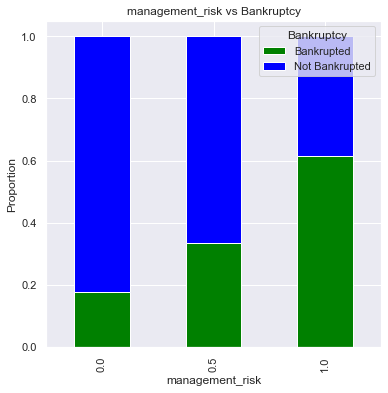

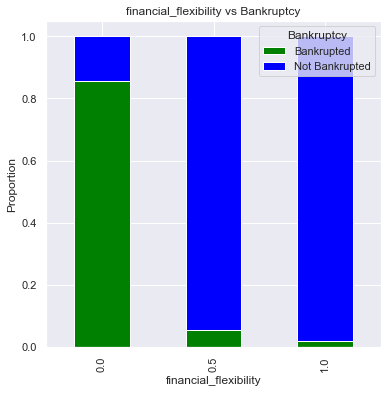

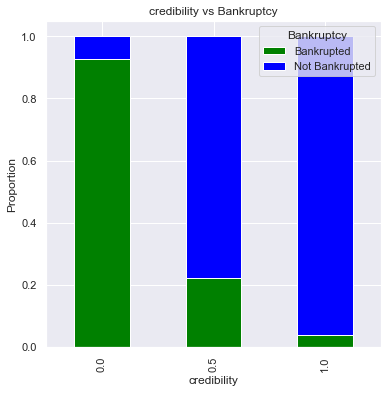

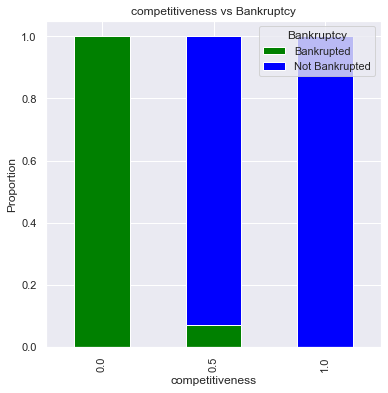

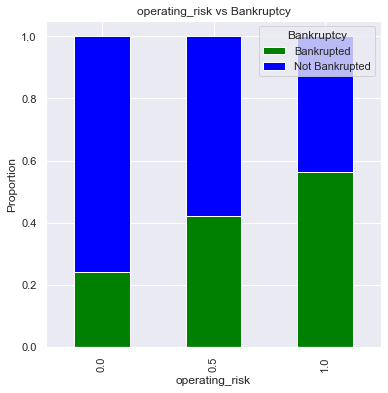

In [40]:
for feature in features:
    counts_df = data1.groupby([feature, "class_value"])["competitiveness"].count().unstack()
    Bankruptcy_df = counts_df.T.div(counts_df.T.sum()).T
    g=Bankruptcy_df.plot(kind="bar", stacked=True, color=["green", "blue"]).set(title="%s vs Bankruptcy"%feature)

    plt.gcf().set_size_inches(6,6)
    plt.legend(title='Bankruptcy', loc='upper right', labels=['Bankrupted', 'Not Bankrupted'])
    plt.xlabel(feature)
    plt.ylabel("Proportion")

### The above graph shows the comparisions between the bankruptcy classes.<br>We can see the proportion of classes w.r.t the discrete values of the features.
***

# CONCLUSION FROM EDA PROCESS: <a id="11"></a>

### From the basic pd.crosstab executions, we find that Financial Flexibility, Competitiveness and Credibility does the most contribution for the bankruptcy.

### From the Histograms, we can assume that Industrial Risk, Management Risk and Operating Risk have varied businessess(count) with varied Bankruptcy classes. These 3 feature surely impact a little for determining Bankruptcy.

### The Density Estimate plots give the distribuiton shape which is Normally Distributed.

### The grouped Bar charts(1&2) gives us the relation between features and Bankruptcy. We can declare Financial Flexibility, Competitiveness and Credibility are showing higher contribution to Bankruptcy.<br>We can also assume that Industrial Risk, Management Risk and Operating Risk have some impact in determining Bankruptcy. Its still Unclear.

### Stacked Bar charts tells us that in what proportion the data is distributed based on Bankruptcy. 
***

[Get back to Contents](#home)<br>

## MODEL BUILDING

### Splitting the data into features and target

In [45]:
X=data1.iloc[:,0:6]
X.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
0,0.5,1.0,0.0,0.0,0.0,0.5
1,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,0.5,0.0,0.0,0.5,0.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0


In [44]:
Y=data1["class_value"]
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: class_value, dtype: int32

### Splitting Data for train and test

In [43]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=123,test_size=0.20)

In [46]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(200, 6)
(50, 6)
(200,)
(50,)


### Feature Engineering

In [47]:
selector = SelectFromModel(estimator = RandomForestClassifier(n_estimators=20,random_state=0,n_jobs=-1))
selector.fit(X_train,Y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=20, n_jobs=-1,
                                                 random_state=0))

In [48]:
selector.get_support()

array([False, False,  True,  True,  True, False])

In [49]:
features = X_train.columns[selector.get_support()]
features

Index(['financial_flexibility', 'credibility', 'competitiveness'], dtype='object')

### We can conclude that financial flexibililty,credibility and competitiveness are the most important features to predict bankruptcy.
***